In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
train = pd.read_csv(r"C:\Users\user\Downloads\Train.csv") 
test = pd.read_csv(r"C:\Users\user\Downloads\Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
train.shape

(8523, 12)

In [11]:
test.shape

(5681, 11)

In [12]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [15]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
idsUnique = len(set(train.Item_Identifier))
idsTotal = train.shape[0]
Duplicate = idsTotal-idsUnique
print("Total Unique value in Item_Identifier ",Duplicate,"From ",train.Item_Identifier.shape[0])
print(idsUnique)

Total Unique value in Item_Identifier  6964 From  8523
1559


Text(0.5, 1.0, ' Distribution of the target variable: Item_Outlet_Sales')

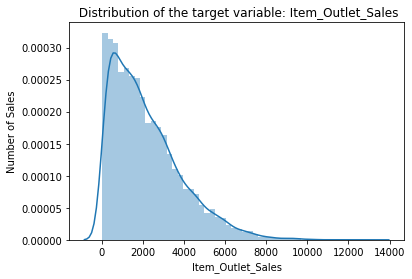

In [25]:
sns.distplot(train.Item_Outlet_Sales, bins = 50)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title(' Distribution of the target variable: Item_Outlet_Sales')

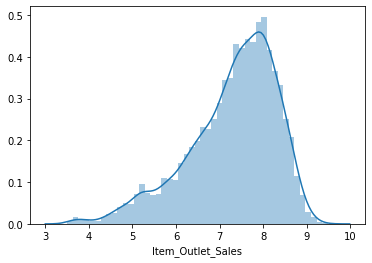

In [26]:
sns.distplot(np.log(train["Item_Outlet_Sales"]))

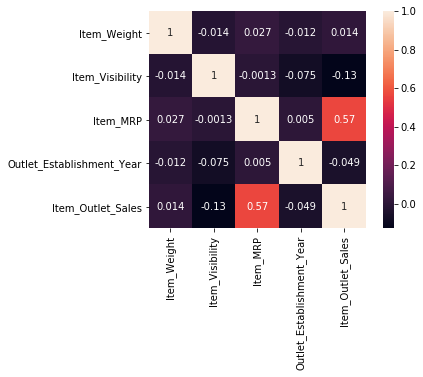

In [29]:
# Correlation between Numerical Features and Target variable
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
#correlation matrix
sns.heatmap(corr,square=True,annot=True);

In [30]:
#all categorical feature
cat_features = train.select_dtypes(include=[np.object])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


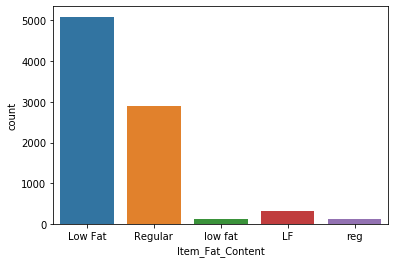

In [31]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

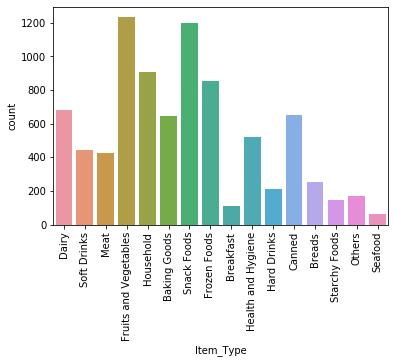

In [33]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

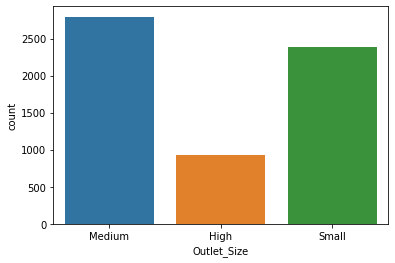

In [34]:
sns.countplot(train.Outlet_Size)

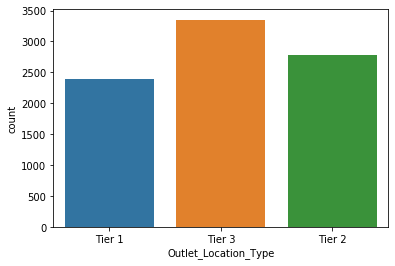

In [35]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

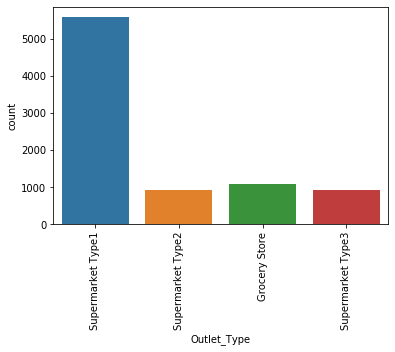

In [36]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

In [37]:
numeric_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


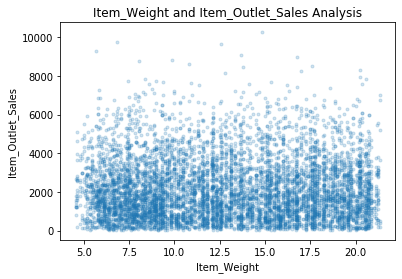

In [43]:
# Item_Weight and Item_Outlet_Sales analysis
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train['Item_Weight'], train["Item_Outlet_Sales"],'.', alpha = 0.2)

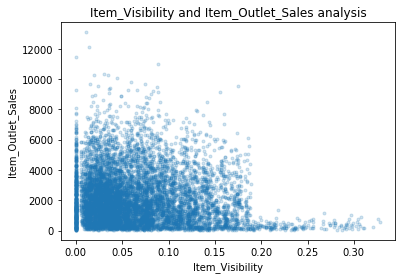

In [45]:
# Item_Visibility and Item_Outlet_Sales analysis
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales analysis")
plt.plot(train['Item_Visibility'], train["Item_Outlet_Sales"],'.', alpha = 0.2)

Text(0, 0.5, 'Item_Outlet_Sales')

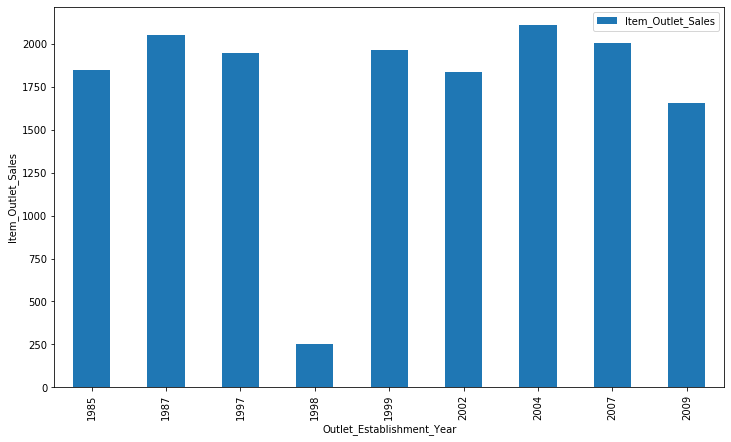

In [46]:
## Outlet_Establishment_Year and Item_Outlet_Sales analysis
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', figsize=(12,7))
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

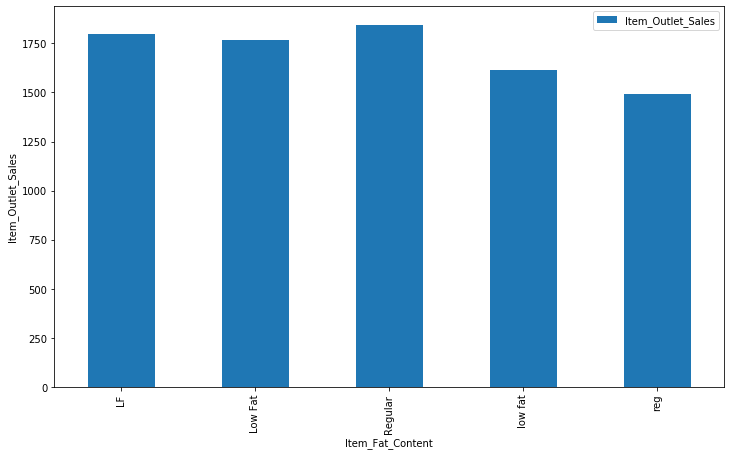

In [47]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot .plot(kind='bar', figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

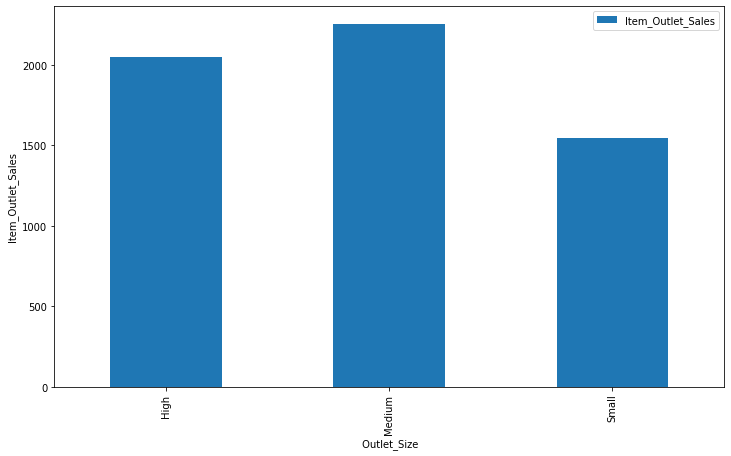

In [49]:
Item_Size_pivot = train.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Size_pivot .plot(kind='bar', figsize=(12,7))
plt.xlabel(' Outlet_Size')
plt.ylabel('Item_Outlet_Sales')

In [50]:
a = train.isnull().sum()
a

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [51]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].median())

In [52]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [53]:
b = train.isnull().sum()
print("before clean nan value",a.sum())
print("after Clean nan value",b.sum())

before clean nan value 3873
after Clean nan value 0


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [55]:
# Item_Visibility minimum value is 0
Item_Visibility_zero = test['Item_Visibility']== 0
print("There are total zero present is ",Item_Visibility_zero.sum())

There are total zero present is  353


In [56]:
train['Item_Visibility'] = train['Item_Visibility'].replace({ 0.000000:np.nan})
test['Item_Visibility'] = test['Item_Visibility'].replace({ 0.000000:np.nan})

In [57]:
train['Item_Visibility'] = train['Item_Visibility'].fillna(train['Item_Visibility'].mean())
test['Item_Visibility'] = test['Item_Visibility'].fillna(test['Item_Visibility'].mean())

In [58]:
# Create a broad category of Item_Type
train['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [59]:
#Get the first two characters of ID:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [61]:
#Get the first two characters of ID:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [60]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(train['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [62]:
#Modify categories of Item_Fat_Content
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print(test['Item_Fat_Content'].value_counts())

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


In [63]:
#Mark non-consumables as separate category in low_fat:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [64]:
#Mark non-consumables as separate category in low_fat:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [65]:
cat_features = train.select_dtypes(include=[np.object])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,NCD19,Non-Edible,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [66]:
train_copy = train.copy()
test_copy=test.copy()

In [67]:
cat_features = train_copy.select_dtypes(include=[np.object])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,Food
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,Drinks
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,Food
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,Food
4,NCD19,Non-Edible,Household,OUT013,High,Tier 3,Supermarket Type1,Non-Consumable


In [68]:
train_copy = train_copy.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)
test_copy = test_copy.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1)

# lets encode the education in their degree of importance 
train_copy['Item_Fat_Content'] = train_copy['Item_Fat_Content'].replace(("Low Fat", "Regular", "Non-Edible"),
                                                (3, 2, 1))
test_copy['Item_Fat_Content'] = test_copy['Item_Fat_Content'].replace(("Low Fat", "Regular", "Non-Edible"),
                                                (3, 2, 1))

In [69]:
train_copy['Outlet_Size'] = train_copy['Outlet_Size'].replace(("Medium", "Small", "High"),
                                                (3, 2, 1))
test_copy['Outlet_Size'] = test_copy['Outlet_Size'].replace(("Medium", "Small", "High"),
                                                (3, 2, 1))

train_copy['Outlet_Location_Type'] = train_copy['Outlet_Location_Type'].replace(("Tier 3", "Tier 2", "Tier 1"),
                                                (3, 2, 1))
test_copy['Outlet_Location_Type'] = test_copy['Outlet_Location_Type'].replace(("Tier 3", "Tier 2", "Tier 1"),
                                                (3, 2, 1))

train_copy['Item_Type_Combined'] = train_copy['Item_Type_Combined'].replace(("Food", "Non-Consumable", "Drinks"),
                                                (3, 2, 1))
test_copy['Item_Type_Combined'] = test_copy['Item_Type_Combined'].replace(("Food", "Non-Consumable", "Drinks"),
                                                (3, 2, 1))


test_copy['Outlet_Type']= test_copy['Outlet_Type'].replace(('Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'),(1,2,3,4))
train_copy['Outlet_Type'] = train_copy['Outlet_Type'].replace(('Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'), (1,2,3,4))

In [70]:

cat_features = train_copy.select_dtypes(include=[np.object])
cat_features.head()

,Item_Type
0,Dairy
1,Soft Drinks
2,Meat
3,Fruits and Vegetables
4,Household


In [71]:
train_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,3,0.016047,Dairy,249.8092,1999,3,1,1,3735.1380,3
1,5.92,2,0.019278,Soft Drinks,48.2692,2009,3,3,4,443.4228,1
2,17.50,3,0.016760,Meat,141.6180,1999,3,1,1,2097.2700,3
3,19.20,2,0.070482,Fruits and Vegetables,182.0950,1998,3,3,2,732.3800,3
4,8.93,1,0.070482,Household,53.8614,1987,1,3,1,994.7052,2


In [72]:
train_copy = train_copy.drop(['Item_Type'], axis = 1)
test_copy = test_copy.drop(['Item_Type'], axis = 1)

train_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,3,0.016047,249.8092,1999,3,1,1,3735.1380,3
1,5.92,2,0.019278,48.2692,2009,3,3,4,443.4228,1
2,17.50,3,0.016760,141.6180,1999,3,1,1,2097.2700,3
3,19.20,2,0.070482,182.0950,1998,3,3,2,732.3800,3
4,8.93,1,0.070482,53.8614,1987,1,3,1,994.7052,2


In [73]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int64  
 6   Outlet_Location_Type       8523 non-null   int64  
 7   Outlet_Type                8523 non-null   int64  
 8   Item_Outlet_Sales          8523 non-null   float64
 9   Item_Type_Combined         8523 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [74]:
test_copy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,20.750,3,0.007565,107.8622,1999,3,1,1,3
1,8.300,2,0.038428,87.3198,2007,3,2,1,3
2,14.600,1,0.099575,241.7538,1998,3,3,2,2
3,7.315,3,0.015388,155.0340,2007,3,2,1,3
4,12.500,2,0.118599,234.2300,1985,3,3,3,3


In [82]:
#Export files as modified versions:
train_copy.to_csv("C:\\Users\\user\\Downloads\\train_cleaned.csv",index=False)
test_copy.to_csv("C:\\Users\\user\\Downloads\\test_cleaned.csv",index=False)